# 

Prepare model by using Decision Tree, Random Forest & Calculate Accuracy by confusion matrix, Calculate accuracy score, precision score, recall score, f1 score.


# import libraries 

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# load the data

In [4]:
df = pd.read_csv('./framingham.csv')
df


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# EDA

In [5]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
df.shape

(4240, 16)

In [17]:
df['glucose'].unique()

array([ 77.        ,  76.        ,  70.        , 103.        ,
        85.        ,  99.        ,  78.        ,  79.        ,
        88.        ,  61.        ,  64.        ,  84.        ,
        81.96365524,  72.        ,  89.        ,  65.        ,
       113.        ,  75.        ,  83.        ,  66.        ,
        74.        ,  63.        ,  87.        , 225.        ,
        90.        ,  80.        , 100.        , 215.        ,
        98.        ,  62.        ,  95.        ,  94.        ,
        55.        ,  82.        ,  93.        ,  73.        ,
        45.        , 202.        ,  68.        ,  97.        ,
       104.        ,  96.        , 126.        , 120.        ,
       105.        ,  71.        ,  56.        ,  60.        ,
       117.        , 102.        ,  58.        ,  92.        ,
       109.        ,  86.        , 107.        ,  54.        ,
        67.        ,  69.        ,  57.        ,  91.        ,
       132.        , 150.        ,  59.        ,  81.  

In [18]:
df1 = df.drop('education', axis=1)

In [19]:
# fill the na values 

df1['cigsPerDay'] = df1['cigsPerDay'].fillna(df1['cigsPerDay'].mean())

df1['BPMeds'] = df1['BPMeds'].fillna(df1['BPMeds'].mode()[0])
df1['totChol'] = df1['totChol'].fillna(df1['totChol'].mean())
df1['BMI'] = df1['BMI'].fillna(df1['BMI'].median())
df1['heartRate'] = df1['heartRate'].fillna(df1['heartRate'].mean())
df1['glucose'] = df1['glucose'].fillna(df1['glucose'].mean())


In [21]:
df1.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [22]:
df1.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.197026,0.316023,-0.051544,-0.004550,0.005853,0.015693,-0.070064,-0.035879,0.058199,0.081852,-0.116913,0.005718,0.088374
age,-0.029014,1.000000,-0.213662,-0.192534,0.121011,0.057679,0.306799,0.101314,0.260691,0.394053,0.205586,0.135470,-0.012839,0.116951,0.225408
currentSmoker,0.197026,-0.213662,1.000000,0.767055,-0.048348,-0.032980,-0.103710,-0.044285,-0.046211,-0.130281,-0.107933,-0.167368,0.062678,-0.054062,0.019448
cigsPerDay,0.316023,-0.192534,0.767055,1.000000,-0.045684,-0.032711,-0.066444,-0.037086,-0.026182,-0.088523,-0.056473,-0.092765,0.075257,-0.056020,0.057646
BPMeds,-0.051544,0.121011,-0.048348,-0.045684,1.000000,0.114614,0.258580,0.051407,0.078775,0.251479,0.192254,0.099617,0.015136,0.048876,0.086448
prevalentStroke,-0.004550,0.057679,-0.032980,-0.032711,0.114614,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.024283,-0.017674,0.018065,0.061823
prevalentHyp,0.005853,0.306799,-0.103710,-0.066444,0.258580,0.074791,1.000000,0.077752,0.162683,0.696656,0.615840,0.300537,0.146777,0.082757,0.177458
diabetes,0.015693,0.101314,-0.044285,-0.037086,0.051407,0.006955,0.077752,1.000000,0.040161,0.111265,0.050260,0.086058,0.048986,0.605709,0.097344
totChol,-0.070064,0.260691,-0.046211,-0.026182,0.078775,0.000105,0.162683,0.040161,1.000000,0.207436,0.163423,0.115129,0.090678,0.044710,0.081807
sysBP,-0.035879,0.394053,-0.130281,-0.088523,0.251479,0.057000,0.696656,0.111265,0.207436,1.000000,0.783952,0.325087,0.182084,0.134561,0.216374


### split the data into x and y

In [23]:
x = df1[['male' , 'age', 'cigsPerDay' ,'BPMeds' , 'prevalentStroke','diabetes','totChol','sysBP','BMI','glucose']]
y = df1['TenYearCHD']

## split the data inyo train and test set 

In [24]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , random_state=123456)


## train the models 


In [25]:

def train_model_dt():
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(max_depth=3)
    model.fit(x_train , y_train)
    return model 

In [26]:
def train_random_forest():
    from sklearn.ensemble import RandomForestClassifier

    model = RandomForestClassifier(max_depth=3)
    model.fit(x_train , y_train)
    return model

## evaluate the model

In [27]:
def evaluate_model(model , model_name):
    from sklearn.metrics import confusion_matrix, accuracy_score , precision_score ,recall_score , f1_score

    y_pred = model.predict(x_test)
    y_true = y_test

    # get the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"confusion matrix: ")
    print(cm)

    accuracy = accuracy_score(y_true , y_pred)
    precision = precision_score(y_true , y_pred)
    recall = recall_score(y_true, y_pred)
    f1 =f1_score(y_true, y_pred)

    return model_name ,cm,  accuracy , precision , recall ,f1

In [28]:
models = [
    
    (train_model_dt(), 'Decision Tree', (0, 0)),
    (train_random_forest(), 'Random Forest', (0, 1))
]

In [29]:
results = []
for (model, model_name, _) in models:
    results.append(evaluate_model(model, model_name))

confusion matrix: 
[[879  35]
 [134  12]]
confusion matrix: 
[[912   2]
 [146   0]]


In [30]:
result_df = pd.DataFrame(results, columns=['Algorithm','confusion metrix', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
result_df

,Algorithm,confusion metrix,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,"[[879, 35], [134, 12]]",0.840566,0.255319,0.082192,0.124352
1,Random Forest,"[[912, 2], [146, 0]]",0.860377,0.000000,0.000000,0.000000


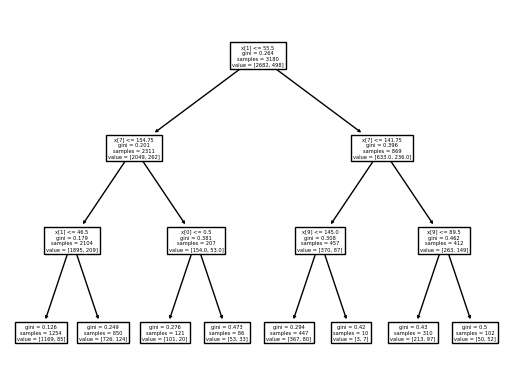

In [31]:
from sklearn.tree import plot_tree
result = plot_tree(models[0][0])